# 변수 치우침 문제
---
- 모델링에 가장 적합한 확률 분포는 정규분포이지만, 실제 다루는 데이터는 변수가 한쪽 방향에 치우쳐 있는 경우가 대부분이다.
- 한 쪽으로 변수가 치우쳐 있으면, 치우친 반대 방향의 값 (= 아래 그림의 꼬리부분) 들이 `이상치 처럼 작용` 할 수 있으므로 제거해 줘야 한다.
---

![치우침](이미지42.png)

## 변수 탐색 방법 : 왜도(skewness) 
---
- 변수 치우침을 확인하기에 가장 적절한 척도
- 왜도는 분포의 비대칭도를 나타내는 통계량, 왜도 값에 따른 데이터의 분포는 아래와 같다.
---

![](이미지43.png)

---
- 일반적으로 `왜도의 절대값 > 1.5` 이면 데이터가 치우쳤다고 판단한다. (절대적인 기준은 아니다.)

## 관련 문법 : scipy.stats
---

- scipy.stats.mode : 최빈값을 구하는 함수
- scipy.stats.skew : 왜도를 구하는 함수
- scipy.stats.kurtosis : 첨도를 구하는 함수
---

- 변수의 치우침 문제를 해결하는 핵심은 `값 사이의 차이를 줄이는 것` 이다.
- 대표적인 처리방식은 아래와 같다.
![](이미지44.png)
---

- 두 가지 모두 min값을 빼는 연산이 들어가 있다 
- 둘다 양수에 대해서만 정의 되기 때문 -> 즉, x가 음수인걸 방지하기 위함

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

df = pd.read_csv("Sonar_Mines_Rocks.csv")
df.head()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Y
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R


In [2]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [3]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [4]:
Train_X.skew() # 왜도 확인

Band1     2.009857
Band2     2.489728
Band3     3.145691
Band4     3.682984
Band5     2.239760
Band6     1.236606
Band7     0.839397
Band8     1.417339
Band9     1.701047
Band10    1.353412
Band11    1.062486
Band12    0.438254
Band13    0.675236
Band14    1.109336
Band15    0.924696
Band16    0.830125
Band17    0.783883
Band18    0.678354
Band19    0.411325
Band20    0.108063
Band21   -0.034736
Band22   -0.274950
Band23   -0.611264
Band24   -0.725188
Band25   -0.793546
Band26   -0.651028
Band27   -0.666736
Band28   -0.634275
Band29   -0.571756
Band30   -0.270262
Band31    0.147533
Band32    0.299008
Band33    0.404763
Band34    0.507678
Band35    0.541791
Band36    0.621823
Band37    0.737148
Band38    1.049953
Band39    0.950156
Band40    0.934566
Band41    0.866698
Band42    0.814357
Band43    0.963008
Band44    1.284180
Band45    1.342824
Band46    1.591834
Band47    1.696766
Band48    1.196462
Band49    1.216696
Band50    1.671294
Band51    2.741409
Band52    2.211963
Band53    1.

Band4의 왜도가 가장 크다.

<AxesSubplot:>

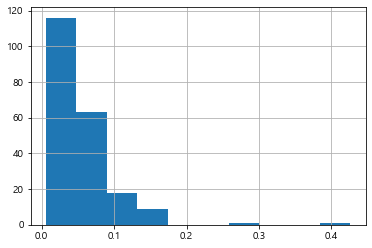

In [5]:
# Band4의 모양 확인

%matplotlib inline
df['Band4'].hist()

# 치우침 제거 성능 비교 모델 생성

In [6]:
Y.unique()

array(['R', 'M'], dtype=object)

In [7]:
# 라벨 숫자로 바꾸기
Train_Y.replace({"M":-1, "R":1}, inplace = True)
Test_Y.replace({"M":-1, "R":1}, inplace = True)

In [8]:
from sklearn.metrics import f1_score #분류 모델 평가지표
from sklearn.neural_network import MLPClassifier as MLP

# 원본 데이터로 모델링
model = MLP(random_state = 153, max_iter = 1000).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.8400000000000001


# 왜도 기반 치우친 변수 제거후 평가

In [9]:
# 왜도 기반 치우친 변수 제거 
import numpy as np
biased_variables = Train_X.columns[Train_X.skew().abs() > 1.5] # 왜도의 절대값(abs)이 1.5 이상인 컬럼만 가져오기

In [10]:
# 치우침 제거 (train)
Train_X[biased_variables] = Train_X[biased_variables] - Train_X[biased_variables].min() + 1
Train_X[biased_variables] = np.log10(Train_X[biased_variables])

In [11]:
# 치우침 제거 후 모델 평가
model = MLP(random_state = 153, max_iter = 1000).fit(Train_X, Train_Y)

# 테스트도 데이터도 같은 방법으로 전처리 수행(치우침 제거)
Test_X[biased_variables] = Test_X[biased_variables] - Test_X[biased_variables].min() + 1
Test_X[biased_variables] = Test_X[biased_variables].apply(np.log)

pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.6153846153846155


모델 평가 지표가 `0.8400000000000001 => 0.6153846153846155` 로 향상 되었다.